# GO Annotation

following [AnnotationDbi manual](https://bioconductor.org/packages/devel/bioc/vignettes/AnnotationDbi/inst/doc/IntroToAnnotationPackages.pdf#page=8.61) and [GO.db manual](https://bioconductor.org/packages/release/data/annotation/manuals/GO.db/man/GO.db.pdf)

In [4]:
library(GO.db)

In [1]:
dmgs <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/GO_terms/sigDMG.goSlim.csv')
head(dmgs)

,gene_id,order,name,pair_vs_HC,gene_name,process,notes,GO.IDs,GOslim,Term
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,LOC111117760,1,"disintegrin and metalloproteinase domain-containing protein 10-like, transcript variant X3","CH, HH, CC",ADAM10,"cell signaling, adhesion, migration",,GO:0007219,GO:0023052,signaling
2,LOC111119327,2,"calcyphosin-like protein, transcript variant X3","CH, HH, CC",CAPSL,calcium ion binding,,NA,NA,NA
3,LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048568,GO:0048856,anatomical structure development
4,LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0009887,GO:0048856,anatomical structure development
5,LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048666,GO:0030154;GO:0048856,cell differentiation
6,LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048666,GO:0030154;GO:0048856,anatomical structure development


In [5]:
# looking at parent terms from the GO database
GOIDs <- dmgs$GO.IDs
AnnotationDbi::select(GO.db, keys=GOIDs, columns="TERM", keytype="GOID")

'select()' returned many:1 mapping between keys and columns



GOID,TERM
<chr>,<chr>
GO:0007219,Notch signaling pathway
NA,NA
GO:0048568,embryonic organ development
GO:0009887,animal organ morphogenesis
GO:0048666,neuron development
GO:0048666,neuron development
GO:0006357,regulation of transcription by RNA polymerase II
GO:0006357,regulation of transcription by RNA polymerase II
NA,NA


In [6]:
# Ensure GOIDs is a character vector without NA values
GOIDs <- as.character(dmgs$GO.IDs)
GOIDs <- GOIDs[!is.na(GOIDs)]

# Get the parent terms for each of your GO IDs
parent_terms <- mget(GOIDs, envir = GOBPPARENTS)

# Initialize an empty data frame to store the results
results <- data.frame(GO_ID = character(), Parent_GO_ID = character(), Parent_Term = character(), stringsAsFactors = FALSE)

# Loop through each of your GO IDs and their parent terms
for (i in seq_along(GOIDs)) {
  go_id <- GOIDs[i]
  parent_id <- parent_terms[[i]]
  
  # Get the term name for the parent ID
  parent_term <- Term(GOTERM[[parent_id[1]]])
  
  # Add the result to the data frame
  results <- rbind(results, data.frame(GO_ID = go_id, Parent_GO_ID = parent_id[1], Parent_Term = parent_term))
}

# Print the results
results

,GO_ID,Parent_GO_ID,Parent_Term
,<chr>,<chr>,<chr>
isa,GO:0007219,GO:0007166,cell surface receptor signaling pathway
part of,GO:0048568,GO:0009790,embryo development
isa1,GO:0009887,GO:0009653,anatomical structure morphogenesis
part of1,GO:0048666,GO:0030182,neuron differentiation
part of2,GO:0048666,GO:0030182,neuron differentiation
isa2,GO:0006357,GO:0006355,regulation of DNA-templated transcription
isa3,GO:0006357,GO:0006355,regulation of DNA-templated transcription
isa4,GO:0090090,GO:0030178,negative regulation of Wnt signaling pathway
isa5,GO:0006398,GO:0008334,histone mRNA metabolic process


In [7]:
colnames(results)[1] <- 'GO.IDs'
head(results)

,GO.IDs,Parent_GO_ID,Parent_Term
,<chr>,<chr>,<chr>
isa,GO:0007219,GO:0007166,cell surface receptor signaling pathway
part of,GO:0048568,GO:0009790,embryo development
isa1,GO:0009887,GO:0009653,anatomical structure morphogenesis
part of1,GO:0048666,GO:0030182,neuron differentiation
part of2,GO:0048666,GO:0030182,neuron differentiation
isa2,GO:0006357,GO:0006355,regulation of DNA-templated transcription


In [8]:
merged <- merge(dmgs, results, by = 'GO.IDs')
head(merged)

#dplyr::select(merged, process, Term, Parent_Term)

,GO.IDs,gene_id,order,name,pair_vs_HC,gene_name,process,notes,GOslim,Term,Parent_GO_ID,Parent_Term
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GO:0000012,LOC111111498,113,"uncharacterized LOC111111498, transcript variant X2",CH,,,,GO:0006281,DNA repair,GO:0006281,DNA repair
2,GO:0000027,LOC111119745,27,60S ribosomal protein L10-like,"CH, HH",RPL10,translation,,GO:0042254;GO:0065003,protein-containing complex assembly,GO:0022618,protein-RNA complex assembly
3,GO:0000027,LOC111119745,27,60S ribosomal protein L10-like,"CH, HH",RPL10,translation,,GO:0042254;GO:0065003,protein-containing complex assembly,GO:0022618,protein-RNA complex assembly
4,GO:0000027,LOC111119745,27,60S ribosomal protein L10-like,"CH, HH",RPL10,translation,,GO:0042254;GO:0065003,ribosome biogenesis,GO:0022618,protein-RNA complex assembly
5,GO:0000027,LOC111119745,27,60S ribosomal protein L10-like,"CH, HH",RPL10,translation,,GO:0042254;GO:0065003,ribosome biogenesis,GO:0022618,protein-RNA complex assembly
6,GO:0000028,LOC111127769,165,"30S ribosomal protein S11-like, transcript variant X4",CH,rps11,cytoplasmic translation,,GO:0042254;GO:0065003,protein-containing complex assembly,GO:0022618,protein-RNA complex assembly


In [9]:
length(unique(merged$Parent_Term))
length(unique(merged$Term)) # less Terms (which were the GO slim terms, than Parent Terms and they basically are the same thing ...

[1] 101

[1] 43

## ONLY unique DMGs

for **control control vs. hypoxic control**

CC vs. HC

In [17]:
library(tidyverse)

**hypoxic hypoxic vs. hypoxic control**

HH vs. HC

In [104]:
unique_HH <- merged %>%
filter(pair_vs_HC == 'HH') %>%
group_by(Term) %>%
count() %>%
mutate(Percent = round((n / sum(unique_HH$n)) * 100, 2))

unique_HH

Term,n,Percent
<chr>,<int>,<dbl>
DNA-templated transcription,18,25.35
anatomical structure development,2,2.82
carbohydrate derivative metabolic process,1,1.41
carbohydrate metabolic process,1,1.41
cell adhesion,1,1.41
cilium organization,1,1.41
cytokinesis,1,1.41
intracellular protein transport,7,9.86
lipid metabolic process,1,1.41


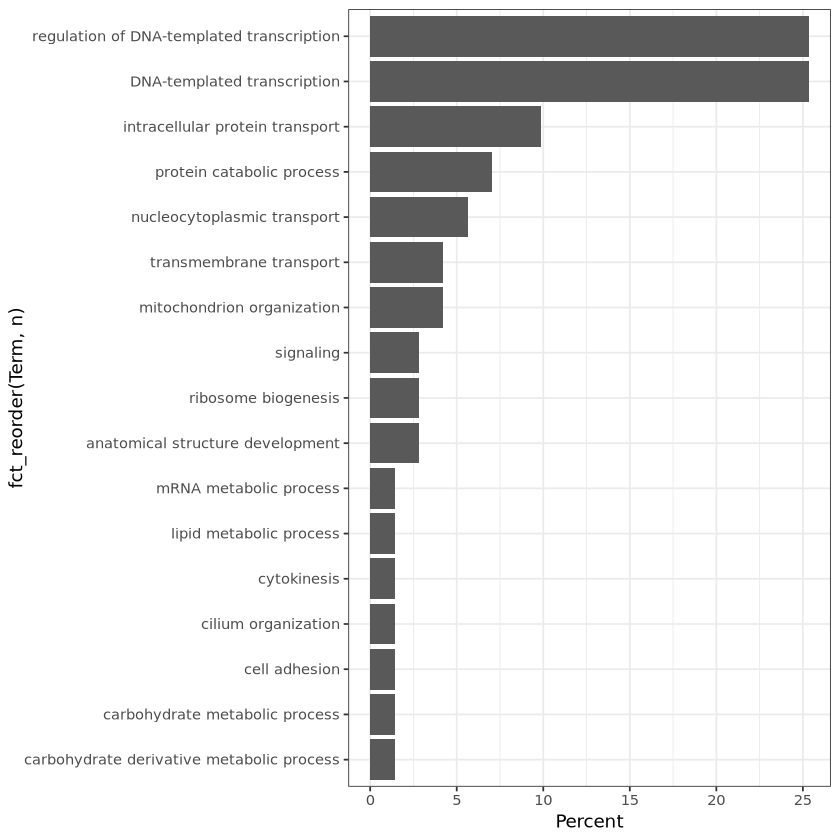

In [105]:
ggplot(unique_HH, aes(x = fct_reorder(Term,n), y = Percent)) + 
geom_col() +
coord_flip() +
theme_bw()

**control hypoxic vs. hypoxic control**

CH vs. HC

In [110]:
unique_CH <- merged %>%
filter(pair_vs_HC == 'CH') %>%
group_by(Term) %>%
count() %>%
mutate(Percent = round((n / sum(unique_CH$n)) * 100, 2)) %>%
arrange(desc(Percent))

unique_CH

Term,n,Percent
<chr>,<int>,<dbl>
DNA-templated transcription,77,24.60
regulation of DNA-templated transcription,72,23.00
signaling,25,7.99
protein catabolic process,15,4.79
intracellular protein transport,12,3.83
mitotic cell cycle,10,3.19
ribosome biogenesis,8,2.56
DNA repair,7,2.24
generation of precursor metabolites and energy,6,1.92


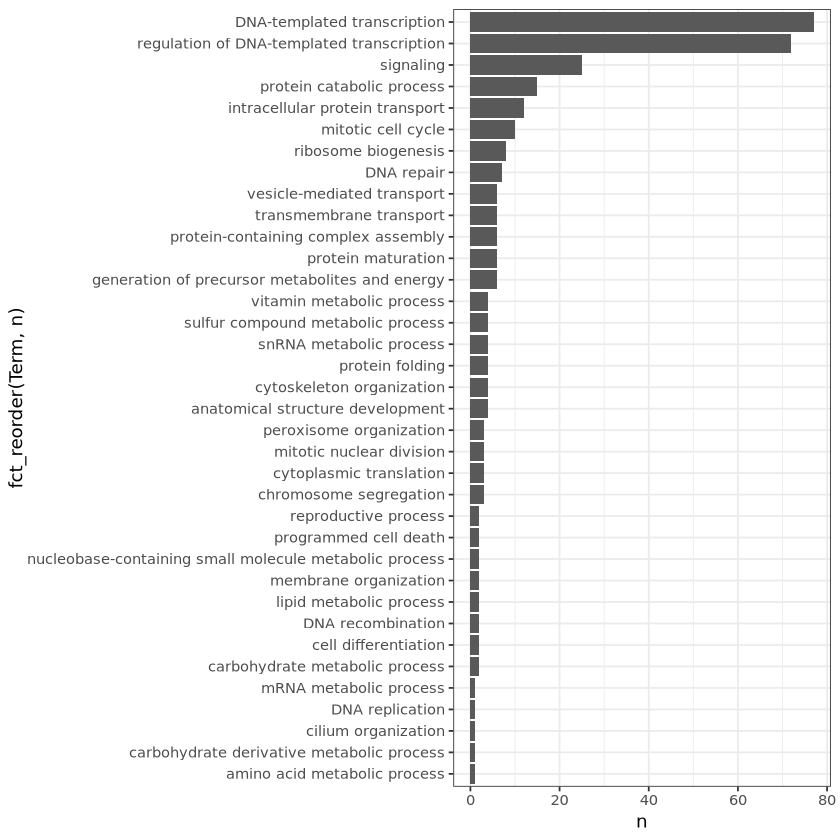

In [54]:
ggplot(unique_CH, aes(x = fct_reorder(Term,n), y = n)) + 
geom_col() +
coord_flip() +
theme_bw()

## ONLY shared DMGs


**CH vs. HC** and **HH vs. HC**

In [111]:
shared1 <- merged %>%
filter(pair_vs_HC == 'CH, HH') %>%
group_by(Term) %>%
count() %>%
mutate(Percent = round((n / sum(shared1$n)) * 100, 2)) %>%
arrange(desc(Percent))

shared1

Term,n,Percent
<chr>,<int>,<dbl>
intracellular protein transport,7,12.73
signaling,6,10.91
carbohydrate derivative metabolic process,5,9.09
mitotic cell cycle,4,7.27
nucleocytoplasmic transport,4,7.27
protein-containing complex assembly,4,7.27
anatomical structure development,3,5.45
lipid metabolic process,3,5.45
mRNA metabolic process,3,5.45


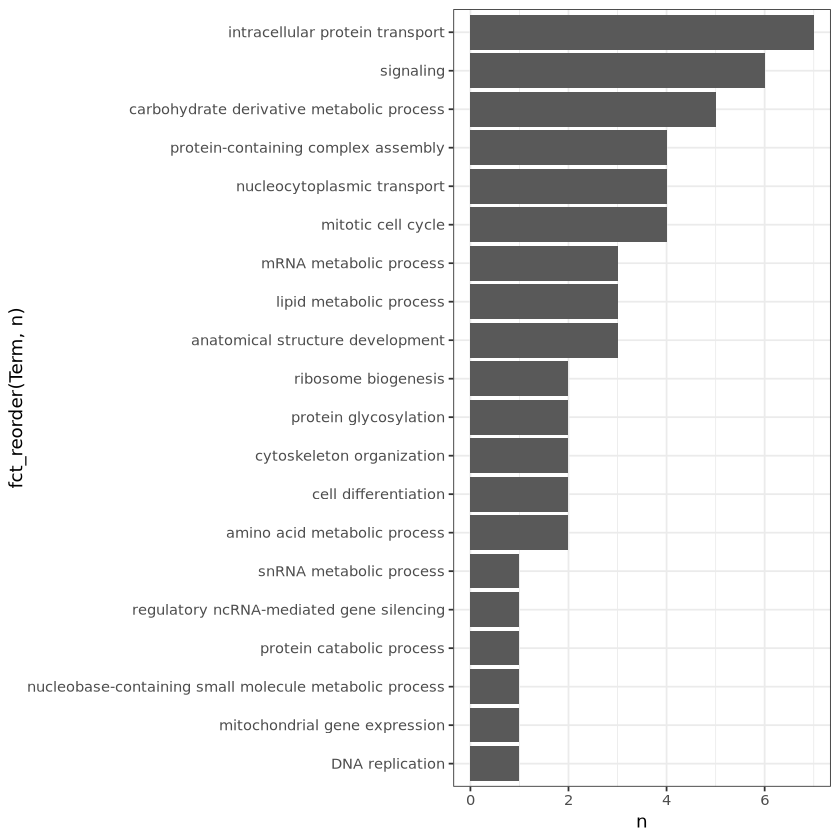

In [64]:
ggplot(shared1, aes(x = fct_reorder(Term,n), y = n)) + 
geom_col() +
coord_flip() +
theme_bw()

shared between **all three**

In [84]:
unique(dmgs$pair_vs_HC)

[1] "CH, HH, CC" "CH, HH"     "CH, CC"     "CC, HH"     "CC"        
[6] "HH"         "CH"

In [114]:
shared2 <- merged %>%
filter(pair_vs_HC == 'CH, HH, CC') %>%
group_by(Term) %>%
count() %>%
mutate(Percent = round((n / sum(shared2$n)) * 100, 2)) %>%
arrange(desc(Percent))

shared2

Term,n,Percent
<chr>,<int>,<dbl>
DNA-templated transcription,14,38.89
regulation of DNA-templated transcription,14,38.89
anatomical structure development,4,11.11
cell differentiation,2,5.56
signaling,2,5.56


so I'm getting tripped up on this because there's a lot of overlap (one gene can be involved in numerous processes), and I've flattened out the GOslim file so there's one bit of info per row, meaning there's not multiple GO terms/names in the same row for a single gene, so a gene will have multiple rows. 

We see a problem with that here, because obviously we only have 6 genes that are shared between all three pairs, 

In [122]:
all.shared <- filter(dmgs, dmgs$pair_vs_HC == 'CH, HH, CC') 
unique(all.shared$gene_id)

all.shared %>%
group_by(gene_id)

[1] "LOC111117760" "LOC111119327" "LOC111123492" "LOC111124674" "LOC111129146"
[6] "LOC111133438"

gene_id,order,name,pair_vs_HC,gene_name,process,notes,GO.IDs,GOslim,Term
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
LOC111117760,1,"disintegrin and metalloproteinase domain-containing protein 10-like, transcript variant X3","CH, HH, CC",ADAM10,"cell signaling, adhesion, migration",,GO:0007219,GO:0023052,signaling
LOC111119327,2,"calcyphosin-like protein, transcript variant X3","CH, HH, CC",CAPSL,calcium ion binding,,NA,NA,NA
LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048568,GO:0048856,anatomical structure development
LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0009887,GO:0048856,anatomical structure development
LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048666,GO:0030154;GO:0048856,cell differentiation
LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048666,GO:0030154;GO:0048856,anatomical structure development
LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0006357,GO:0006351;GO:0006355,DNA-templated transcription
LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0006357,GO:0006351;GO:0006355,regulation of DNA-templated transcription
LOC111124674,4,"gamma-glutamyltranspeptidase 1-like, transcript variant X1","CH, HH, CC",GGT1,"proteolysis, metabolisis, immune response, spermatogenesis",other are from human homolog,NA,NA,NA


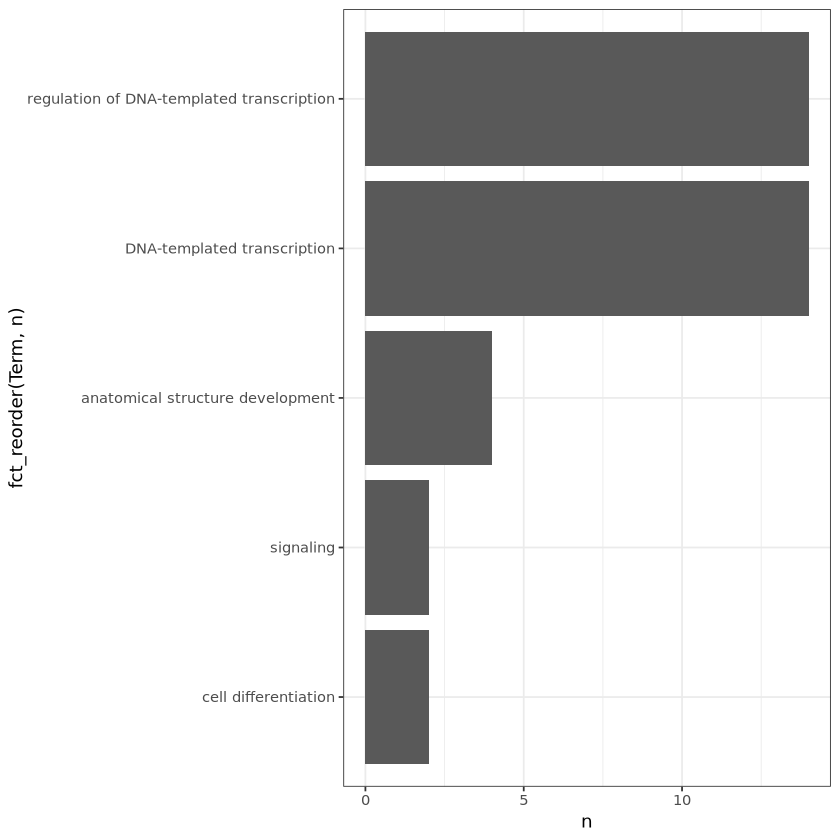

In [86]:
ggplot(shared2, aes(x = fct_reorder(Term,n), y = n)) + 
geom_col() +
coord_flip() +
theme_bw()

**CC vs. HC** and **HH vs. HC**

In [61]:
unique(merged$pair_vs_HC)

[1] "CH"         "CH, HH"     "HH"         "CH, HH, CC" "CC, HH"    
[6] "CC"

In [62]:
shared2 <- merged %>%
filter(pair_vs_HC == 'CC, HH') %>%
group_by(Term) %>%
count()

shared2

Term,n
<chr>,<int>
vesicle-mediated transport,1


### somewhat unrelated to surrounding code
curious how many DMGs 1) do not match to a GO term and 2) are uncharacterized

In [73]:
dim(dmgs[is.na(dmgs$GO.IDs),])

dim(dmgs)

[1] 123  10

[1] 299  10

In [74]:
123/299 # percent of dmgs without matches for GO terms

[1] 0.4113712

In [82]:
dmgs %>%
  filter(grepl("uncharacterized", name)) %>% # pull out anything that is uncharacterized
dim() # 55 genes are uncharacterized

[1] 55 10

In [83]:
55/299

[1] 0.1839465

**shared between:**

CH vs. HC and CC vs. HC

(for whatever reason, this is not showing up in the big dmgs df...

In [42]:
cc.hc <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/sig_DMGs/sig_CC_HC_genes.csv')
ch.hc <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/sig_DMGs/sig_CH_HC_genes.csv')

head(cc.hc)
head(ch.hc)

,X,symbol,baseMean,log2FC,lfcSE,stat,pvalue,padj,name
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,LOC111103344,497.52024,-1.193080,0.2105031,-4.480123,7.460015e-06,0.01869231,"uncharacterized LOC111103344, transcript variant X7"
2,2,LOC111115023,20.27520,-1.349383,0.2740700,-4.011321,6.038007e-05,0.04126154,uncharacterized LOC111115023
3,3,LOC111117745,123.41704,-1.135814,0.2070067,-4.279157,1.876021e-05,0.02350342,"uncharacterized LOC111117745, transcript variant X5"
4,4,LOC111117760,138.87250,-1.494878,0.2901102,-4.291052,1.778290e-05,0.02350342,"disintegrin and metalloproteinase domain-containing protein 10-like, transcript variant X3"
5,5,LOC111118022,19.27594,-1.664142,0.3486511,-4.056038,4.991215e-05,0.03751897,"exocyst complex component 7-like, transcript variant X1"
6,6,LOC111119327,13.31739,-1.507178,0.3154716,-3.985075,6.745881e-05,0.04225732,"calcyphosin-like protein, transcript variant X3"


,X,symbol,baseMean,log2FC,lfcSE,stat,pvalue,padj,name
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,LOC111099548,42.98619,-1.2672684,0.2026166,-5.020656,5.149523e-07,0.0003099498,kinesin-like protein KIF17
2,2,LOC111099571,31.11937,-1.4181929,0.2861630,-4.082264,4.459915e-05,0.0069725275,histone RNA hairpin-binding protein-like
3,3,LOC111099585,36.32548,0.9854391,0.2091056,3.517070,4.363394e-04,0.0332446433,lys-63-specific deubiquitinase BRCC36-like
4,4,LOC111099930,35.09830,-1.1981548,0.2270953,-4.175140,2.978035e-05,0.0051868387,"uncharacterized LOC111099930, transcript variant X1"
5,5,LOC111099978,37.23914,1.1530905,0.2612132,3.457293,5.456316e-04,0.0390971051,"oncoprotein-induced transcript 3 protein-like, transcript variant X1"
6,6,LOC111100608,22.90296,-1.4622657,0.2851646,-4.251109,2.127149e-05,0.0040010349,DDRGK domain-containing protein 1-like


In [43]:
ch.cc.shared <- ch.hc[ch.hc$symbol %in% cc.hc$symbol, ]

hh.hc <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/sig_DMGs/sig_HH_HC_genes.csv')

shared3 <- ch.cc.shared[!ch.cc.shared$symbol %in% hh.hc$symbol,]$symbol
shared3 

[1] "LOC111103344" "LOC111132100" "LOC111133874"

In [44]:
matchGO <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/GO_terms/gene2GOslim.csv')
head(matchGO)

,GO.IDs,GOslim,Term,gene_id
,<chr>,<chr>,<chr>,<chr>
1,GO:0000002,GO:0007005,mitochondrion organization,LOC111135903
2,GO:0000012,GO:0006281,DNA repair,LOC111136704
3,GO:0000012,GO:0006281,DNA repair,LOC111111498
4,GO:0000012,GO:0006281,DNA repair,LOC111128516
5,GO:0000012,GO:0006281,DNA repair,LOC111135354
6,GO:0000012,GO:0006281,DNA repair,LOC111128425


In [46]:
dim(matchGO)

[1] 16024     4

In [45]:
matchGO[shared3 %in% matchGO$gene_id,]

GO.IDs,GOslim,Term,gene_id
<chr>,<chr>,<chr>,<chr>


# new approach

I think I'm having problems with redundancy in my gene categories, so I only want to keep unique GO term entries for each gene ID to avoid this issue

For example: one gene may have multiple, related GO terms and so they all say transcription, inflating results when in reality, it's just one gene that is involved in transcription instead of 50% of the genes aligning with transcription (because it's so redundant)

In [133]:
no_dupes <- dmgs %>%
  group_by(gene_id) %>%
  distinct(Term, .keep_all = TRUE)

head(no_dupes)

gene_id,order,name,pair_vs_HC,gene_name,process,notes,GO.IDs,GOslim,Term
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
LOC111117760,1,"disintegrin and metalloproteinase domain-containing protein 10-like, transcript variant X3","CH, HH, CC",ADAM10,"cell signaling, adhesion, migration",,GO:0007219,GO:0023052,signaling
LOC111119327,2,"calcyphosin-like protein, transcript variant X3","CH, HH, CC",CAPSL,calcium ion binding,,NA,NA,NA
LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048568,GO:0048856,anatomical structure development
LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048666,GO:0030154;GO:0048856,cell differentiation
LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0006357,GO:0006351;GO:0006355,DNA-templated transcription
LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0006357,GO:0006351;GO:0006355,regulation of DNA-templated transcription


In [134]:
write.csv(no_dupes, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/noDupes_sigDMGs.csv', row.names=FALSE)

did some manipulation in excel - if a gene had multiple lines of similarly related categories (like metabolism or transcription), I collapsed them to further help with redundancy
                                                    

In [25]:
noDupe <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/noDupes_sigDMGs2.csv')
head(noDupe)

,gene_id,X,Term,order,name,pair_vs_HC,gene_name,process,notes,GO.IDs,GOslim
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,LOC111117760,signaling,signaling,1,"disintegrin and metalloproteinase domain-containing protein 10-like, transcript variant X3","CH, HH, CC",ADAM10,"cell signaling, adhesion, migration",,GO:0007219,GO:0023052
2,LOC111119327,,NA,2,"calcyphosin-like protein, transcript variant X3","CH, HH, CC",CAPSL,calcium ion binding,,NA,NA
3,LOC111123492,developmental process,anatomical structure development,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048568,GO:0048856
4,LOC111123492,developmental process,cell differentiation,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048666,GO:0030154;GO:0048856
5,LOC111123492,transcription,DNA-templated transcription,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0006357,GO:0006351;GO:0006355
6,LOC111124674,,NA,4,"gamma-glutamyltranspeptidase 1-like, transcript variant X1","CH, HH, CC",GGT1,"proteolysis, metabolisis, immune response, spermatogenesis",other are from human homolog,NA,NA


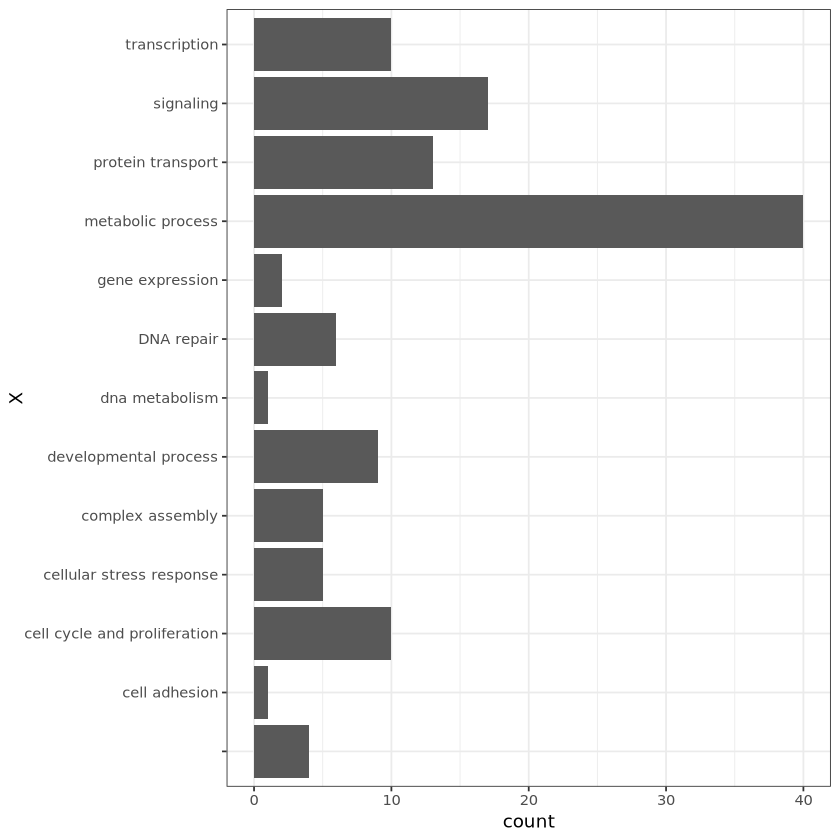

In [31]:
# all sig. DMGs with HC
ggplot(na.omit(noDupe), aes(x=X)) +
geom_bar(stat = 'count') + 
coord_flip() + 
theme_bw()

### only unique DMGs for HH vs. HC (21 dmgs)

In [40]:
HH_unique <- noDupe %>%
filter(pair_vs_HC == 'HH') %>%
count(Term) %>%
mutate(Percent = round((n / sum(n)) * 100, 2)) %>%
arrange(desc(n))

HH_unique

Term,n,Percent
<chr>,<int>,<dbl>
NA,7,30.43
DNA-templated transcription,2,8.70
intracellular protein transport,2,8.70
protein catabolic process,2,8.70
signaling,2,8.70
anatomical structure development,1,4.35
carbohydrate derivative metabolic process,1,4.35
cell adhesion,1,4.35
cilium organization,1,4.35


### only unique for CH vs. HC (136 dmgs)

In [47]:
CH_unique <- noDupe %>%
filter(pair_vs_HC == 'CH') %>%
count(Term) %>%
mutate(Percent = round((n / sum(n)) * 100, 2)) %>%
arrange(desc(n))

CH_unique

Term,n,Percent
<chr>,<int>,<dbl>
NA,79,50.97
signaling,10,6.45
DNA-templated transcription,7,4.52
protein catabolic process,7,4.52
DNA repair,5,3.23
intracellular protein transport,4,2.58
ribosome biogenesis,4,2.58
generation of precursor metabolites and energy,3,1.94
mitotic cell cycle,3,1.94


In [51]:
CH_unique %>%
  mutate(Term = case_when(
    str_detect(Term, "metabolic") ~ "metabolic processes",
    TRUE ~ Term
  )) %>%
  group_by(Term) %>%
  summarise(n = sum(n), Percent = sum(Percent)) %>%
arrange(desc(n))

Term,n,Percent
<chr>,<int>,<dbl>
NA,79,50.97
signaling,10,6.45
metabolic processes,9,5.84
DNA-templated transcription,7,4.52
protein catabolic process,7,4.52
DNA repair,5,3.23
intracellular protein transport,4,2.58
ribosome biogenesis,4,2.58
generation of precursor metabolites and energy,3,1.94


In [59]:
dmgs %>%
  filter(pair_vs_HC == 'CH')  %>%
  select(gene_id, Term) %>%
  distinct() %>% 
  mutate(Term = case_when(
    str_detect(Term, "metabolic") ~ "metabolic processes",
    TRUE ~ Term
  )) %>%
  count(Term) %>%
  mutate(Percent = round((n / sum(n)) * 100, 2)) %>%
  arrange(desc(n))

Term,n,Percent
<chr>,<int>,<dbl>
NA,79,47.02
metabolic processes,11,6.55
signaling,10,5.95
DNA-templated transcription,7,4.17
protein catabolic process,7,4.17
regulation of DNA-templated transcription,6,3.57
DNA repair,5,2.98
intracellular protein transport,4,2.38
ribosome biogenesis,4,2.38


In [62]:
dmgs %>%
filter(pair_vs_HC == 'CH') %>%
  filter(grepl("uncharacterized", name)) %>% # pull out anything that is uncharacterized
dim() # 37 genes are uncharacterized

[1] 37 10

### shared between HH vs. HC and CH vs. HC

In [64]:
shared3 <- noDupe %>%
filter(pair_vs_HC == 'CH, HH') %>%
count(Term) %>%
mutate(Percent = round((n / sum(n)) * 100, 2)) %>%
arrange(desc(n))

shared3

Term,n,Percent
<chr>,<int>,<dbl>
NA,30,55.56
signaling,3,5.56
amino acid metabolic process,2,3.70
carbohydrate derivative metabolic process,2,3.70
intracellular protein transport,2,3.70
lipid metabolic process,2,3.70
mRNA metabolic process,2,3.70
protein-containing complex assembly,2,3.70
DNA replication,1,1.85


In [66]:
shared3 %>%
  mutate(Term = case_when(
    str_detect(Term, "metabolic") ~ "metabolic processes",
    TRUE ~ Term
  )) %>%
  group_by(Term) %>%
  summarise(n = sum(n), Percent = sum(Percent)) %>%
arrange(desc(n))

Term,n,Percent
<chr>,<int>,<dbl>
NA,30,55.56
metabolic processes,9,16.65
signaling,3,5.56
intracellular protein transport,2,3.70
protein-containing complex assembly,2,3.70
DNA replication,1,1.85
anatomical structure development,1,1.85
cytoskeleton organization,1,1.85
mitochondrial gene expression,1,1.85


In [67]:
cc.ch <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/sig_DMGs/sig_CC_CH_genes.csv')
cc.ch

X,symbol,baseMean,log2FC,lfcSE,stat,pvalue,padj,name
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,LOC111100699,13.59616,1.958284,0.3546143,4.817301,1.455128e-06,0.03538143,methylthioribulose-1-phosphate dehydratase-like


In [68]:
colnames(matchGO)

[1] "GO.IDs"  "GOslim"  "Term"    "gene_id"

In [70]:
cc.ch$symbol

[1] "LOC111100699"

In [71]:
matchGO[matchGO$gene_id %in% cc.ch$symbol,]

,GO.IDs,GOslim,Term,gene_id
,<chr>,<chr>,<chr>,<chr>
9088,GO:0019509,GO:0006520;GO:0006790,amino acid metabolic process;sulfur compound metabolic process,LOC111100699


## Table of DMGs with biological process

for NSA talk - want to show list of genes involved with each process (doesn't have to be divided by the treatment - just any DMG)

In [ ]:
library(dplyr)

In [26]:
head(merged)

,GO.IDs,gene_id,order,name,pair_vs_HC,gene_name,process,notes,GOslim,Term,Parent_GO_ID,Parent_Term
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GO:0000012,LOC111111498,113,"uncharacterized LOC111111498, transcript variant X2",CH,,,,GO:0006281,DNA repair,GO:0006281,DNA repair
2,GO:0000027,LOC111119745,27,60S ribosomal protein L10-like,"CH, HH",RPL10,translation,,GO:0042254;GO:0065003,protein-containing complex assembly,GO:0022618,protein-RNA complex assembly
3,GO:0000027,LOC111119745,27,60S ribosomal protein L10-like,"CH, HH",RPL10,translation,,GO:0042254;GO:0065003,protein-containing complex assembly,GO:0022618,protein-RNA complex assembly
4,GO:0000027,LOC111119745,27,60S ribosomal protein L10-like,"CH, HH",RPL10,translation,,GO:0042254;GO:0065003,ribosome biogenesis,GO:0022618,protein-RNA complex assembly
5,GO:0000027,LOC111119745,27,60S ribosomal protein L10-like,"CH, HH",RPL10,translation,,GO:0042254;GO:0065003,ribosome biogenesis,GO:0022618,protein-RNA complex assembly
6,GO:0000028,LOC111127769,165,"30S ribosomal protein S11-like, transcript variant X4",CH,rps11,cytoplasmic translation,,GO:0042254;GO:0065003,protein-containing complex assembly,GO:0022618,protein-RNA complex assembly


In [31]:
merged |>
count(Term) |>
arrange(desc(n))

Term,n
<chr>,<int>
DNA-templated transcription,109
regulation of DNA-templated transcription,104
signaling,35
intracellular protein transport,26
protein catabolic process,25
mitotic cell cycle,14
anatomical structure development,13
ribosome biogenesis,12
protein-containing complex assembly,10


In [28]:
# transcription
merged[grepl("transcription", merged$Term, ignore.case = TRUE), ] |>
distinct(gene_id, .keep_all = TRUE) |>
select(gene_id, gene_name, name, pair_vs_HC, GO.IDs, Term) |>
write.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/GO_terms/nsa_geneList/transcription.csv')

In [29]:
# metabolism
merged[grepl("metabolic|catabolic", merged$Term, ignore.case = TRUE), ] |>
distinct(gene_id, .keep_all = TRUE) |>
select(gene_id, gene_name, name, pair_vs_HC, GO.IDs, Term) |>
write.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/GO_terms/nsa_geneList/metabolism.csv')

In [30]:
# metabolism
merged[grepl("stress", merged$process, ignore.case = TRUE), ] |>
distinct(gene_id, .keep_all = TRUE) |>
select(gene_id, gene_name, name, pair_vs_HC, GO.IDs, Term) |>
write.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/GO_terms/nsa_geneList/stress_response.csv') 

In [32]:
# metabolism
merged[grepl("signaling", merged$Term, ignore.case = TRUE), ] |>
distinct(gene_id, .keep_all = TRUE) |>
select(gene_id, gene_name, name, pair_vs_HC, GO.IDs, Term) |>
write.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/GO_terms/nsa_geneList/signaling.csv') 

# alt. GO analysis

code from the old HC_genes script (now DMGs.ipynb)

(pasted on 8/8/2025)

## GO TERMS of DMGs
Assigning functional categories to DMG

This is being done with [g:Profiler](https://cran.r-project.org/web/packages/gprofiler2/vignettes/gprofiler2.html)

I'm mainly using the **g:GOst tool**, which enables functional profiling of gene lists
- ordered_query = FALSE, meaning the order of genes will *not* be taken into account
- significant = TRUE, returns only the statistically significant results


In [70]:
#BiocManager::install("gprofiler2")
library(gprofiler2)

# GO terms of DMGs in pairwise comparisons
looking at signficiantly enriched GO terms for each of the three pairwise comparisons (instead of just looking at the shared or unique terms)

input is all significant DMGs for that pairwise comparison

#### control hypoxic vs. hypoxic control

In [71]:
sigCH_gl <- sig_CH_HC$symbol

resCH <- gost(sigCH_gl, organism = "cvgca002022765v4", significant=TRUE)  
resCH$result

query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
query_1,TRUE,0.000336070,49,66,6,0.09090909,0.12244898,GO:0072594,GO:BP,establishment of protein localization to organelle,9567,17976,GO:00333....
query_1,TRUE,0.001026065,59,66,6,0.09090909,0.10169492,GO:0033365,GO:BP,protein localization to organelle,9567,8456,GO:0008104
query_1,TRUE,0.011410584,27,66,4,0.06060606,0.14814815,GO:0006605,GO:BP,protein targeting,9567,2349,GO:0045184
query_1,TRUE,0.012892382,10,66,3,0.04545455,0.30000000,GO:0006613,GO:BP,cotranslational protein targeting to membrane,9567,2355,GO:0006612
query_1,TRUE,0.012892382,10,66,3,0.04545455,0.30000000,GO:0006614,GO:BP,SRP-dependent cotranslational protein targeting to membrane,9567,2356,GO:00066....
query_1,TRUE,0.017639600,11,66,3,0.04545455,0.27272727,GO:0006612,GO:BP,protein targeting to membrane,9567,2354,GO:00066....
query_1,TRUE,0.017639600,11,66,3,0.04545455,0.27272727,GO:0045047,GO:BP,protein targeting to ER,9567,11635,GO:00066....
query_1,TRUE,0.017639600,11,66,3,0.04545455,0.27272727,GO:0072599,GO:BP,establishment of protein localization to endoplasmic reticulum,9567,17981,GO:00709....
query_1,TRUE,0.030274581,13,66,3,0.04545455,0.23076923,GO:0070972,GO:BP,protein localization to endoplasmic reticulum,9567,16904,GO:0033365


for DMG when comparing control hypoxic vs. hypoxic control, a lot of GO terms are significant when it's not ordered - but all seem to have to do with protein localization...

In [72]:
# ordered query
sigCH <- sig_CH_HC[order(sig_CH_HC$log2FC),]

sigCH_gl <- sigCH$symbol

resCH <- gost(sigCH_gl, organism = "cvgca002022765v4", significant=FALSE, ordered_query = TRUE)  
head(resCH$result)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,FALSE,0.05934784,10,110,3,0.02727273,0.3000000,GO:0006613,GO:BP,cotranslational protein targeting to membrane,9567,2355,GO:0006612
2,query_1,FALSE,0.05934784,10,110,3,0.02727273,0.3000000,GO:0006614,GO:BP,SRP-dependent cotranslational protein targeting to membrane,9567,2356,GO:00066....
3,query_1,FALSE,0.08092088,11,110,3,0.02727273,0.2727273,GO:0006612,GO:BP,protein targeting to membrane,9567,2354,GO:00066....
4,query_1,FALSE,0.08092088,11,110,3,0.02727273,0.2727273,GO:0072599,GO:BP,establishment of protein localization to endoplasmic reticulum,9567,17981,GO:00709....
5,query_1,FALSE,0.08092088,11,110,3,0.02727273,0.2727273,GO:0045047,GO:BP,protein targeting to ER,9567,11635,GO:00066....
6,query_1,FALSE,0.08648937,49,111,5,0.04504505,0.1020408,GO:0072594,GO:BP,establishment of protein localization to organelle,9567,17976,GO:00333....


In [73]:
resCH$result$parents <- sapply(resCH$result$parents, function(x) paste(unlist(x), collapse = ","))
write.csv(resCH$result, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/geneFeatures_res/GO_terms/CH_GOres.csv')

reuslts change when you do an ordered query (but still have to do with protein targeting) - ordered query allows you to do a GSEA type of analysis - I ordered by log2FoldChange for the sig DMGs, I wonder if that is correct?

### hypoxic hypoxic vs. hypoxic control

In [74]:
sigHH_gl <- sig_HH_HC$symbol

resHH <- gost(sigHH_gl, organism = "cvgca002022765v4", significant=TRUE)  
resHH$result

No results to show
Please make sure that the organism is correct or set significant = FALSE



NULL

In [75]:
# ordered query
sigHH <- sig_HH_HC[order(sig_HH_HC$log2FC),]

sigHH_gl <- sigHH$symbol

resHH <- gost(sigHH_gl, organism = "cvgca002022765v4", significant=FALSE, ordered_query = TRUE)  
head(resHH$result)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,FALSE,0.5610151,1,19,1,0.05263158,1.000000000,GO:0009125,GO:BP,nucleoside monophosphate catabolic process,9567,3329,GO:00091....
2,query_1,FALSE,0.5610151,1,19,1,0.05263158,1.000000000,GO:0009159,GO:BP,deoxyribonucleoside monophosphate catabolic process,9567,3363,GO:00091....
3,query_1,FALSE,0.7080952,4,6,1,0.16666667,0.250000000,GO:0018202,GO:BP,peptidyl-histidine modification,9567,5465,GO:0018193
4,query_1,FALSE,0.7080952,4,6,1,0.16666667,0.250000000,GO:0017183,GO:BP,protein histidyl modification to diphthamide,9567,5352,GO:0018202
5,query_1,FALSE,1.0000000,78,50,1,0.02000000,0.012820513,GO:0031589,GO:BP,cell-substrate adhesion,9567,7495,GO:0007155
6,query_1,FALSE,1.0000000,352,16,1,0.06250000,0.002840909,GO:0016311,GO:BP,dephosphorylation,9567,5262,GO:0006796


In [76]:
resHH$result$parents <- sapply(resHH$result$parents, function(x) paste(unlist(x), collapse = ","))
write.csv(resHH$result, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/geneFeatures_res/GO_terms/HH_GOres.csv')

### control control vs. hypoxic control

In [77]:
sigCC_gl <- sig_CC_HC$symbol

resCC <- gost(sigCC_gl, organism = "cvgca002022765v4", significant=FALSE)  
head(resCC$result)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,FALSE,0.5985047,12,3,1,0.3333333,0.08333333,GO:0044273,GO:BP,sulfur compound catabolic process,9567,11314,GO:00067....
2,query_1,FALSE,0.5985047,12,3,1,0.3333333,0.08333333,GO:0043171,GO:BP,peptide catabolic process,9567,10920,GO:00065....
3,query_1,FALSE,0.5985047,12,3,1,0.3333333,0.08333333,GO:0006887,GO:BP,exocytosis,9567,2572,GO:00161....
4,query_1,FALSE,0.5985047,12,3,1,0.3333333,0.08333333,GO:0006751,GO:BP,glutathione catabolic process,9567,2477,GO:00067....
5,query_1,FALSE,0.6981095,14,3,1,0.3333333,0.07142857,GO:0032940,GO:BP,secretion by cell,9567,8206,GO:00469....
6,query_1,FALSE,0.7478962,15,3,1,0.3333333,0.06666667,GO:0042219,GO:BP,cellular modified amino acid catabolic process,9567,10392,GO:00065....


In [78]:
# ordered query
sigCC <- sig_CC_HC[order(sig_CC_HC$log2FC),]

sigCC_gl <- sigCC$symbol

resCC <- gost(sigCC_gl, organism = "cvgca002022765v4", significant=FALSE, ordered_query = TRUE)  
head(resCC$result)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,FALSE,0.3992327,12,2,1,0.5,0.08333333,GO:0006887,GO:BP,exocytosis,9567,2572,GO:00161....
2,query_1,FALSE,0.4657227,14,2,1,0.5,0.07142857,GO:0032940,GO:BP,secretion by cell,9567,8206,GO:00469....
3,query_1,FALSE,0.4989625,15,2,1,0.5,0.06666667,GO:0140352,GO:BP,export from cell,9567,20313,GO:00068....
4,query_1,FALSE,0.9307634,28,2,1,0.5,0.03571429,GO:0046903,GO:BP,secretion,9567,12846,GO:0006810
5,query_1,FALSE,0.9963615,12,5,1,0.2,0.08333333,GO:0044273,GO:BP,sulfur compound catabolic process,9567,11314,GO:00067....
6,query_1,FALSE,0.9963615,12,5,1,0.2,0.08333333,GO:0043171,GO:BP,peptide catabolic process,9567,10920,GO:00065....


In [79]:
resCC$result$parents <- sapply(resCC$result$parents, function(x) paste(unlist(x), collapse = ","))
write.csv(resCC$result, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/geneFeatures_res/GO_terms/CC_GOres.csv')

In [80]:
head(all_sigDMGs)

,symbol,name,pair
,<chr>,<chr>,<chr>
1,LOC111117760,"disintegrin and metalloproteinase domain-containing protein 10-like, transcript variant X3","CH, HH, CC"
2,LOC111119327,"calcyphosin-like protein, transcript variant X3","CH, HH, CC"
3,LOC111123492,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC"
4,LOC111124674,"gamma-glutamyltranspeptidase 1-like, transcript variant X1","CH, HH, CC"
5,LOC111129146,FERM domain-containing protein 8-like,"CH, HH, CC"
6,LOC111133438,uncharacterized LOC111133438,"CH, HH, CC"


In [81]:
# Load required packages
library(GO.db)
library(ontologyIndex)

# Load the GO ontology file
go_file <- "path/to/go-basic.obo"
go_ontology <- readObo(go_file)

# Map your LOC numbers or gene symbols to GO terms
your_loc_numbers_or_gene_symbols <- c("LOC1", "LOC2", "LOC3")
go_terms <- mapLocToGo(your_loc_numbers_or_gene_symbols, go_ontology)

# View the results
View(go_terms)

ERROR: Error in library(ontologyIndex): there is no package called ‘ontologyIndex’


# GO Slim

In [82]:
# Read the gene ontology GAF file into R
gaf_data <- read.table('/project/pi_sarah_gignouxwolfsohn_uml_edu/Reference_genomes/Cvirginica_genome/GCF_002022765.2_C_virginica-3.0_gene_ontology.gaf', 
                          sep = "\t", 
                          header = FALSE, 
                          comment.char = "!", 
                          stringsAsFactors = FALSE)

# assign column names
colnames(gaf_data) <- c('DB', 'GeneID', 'Symbol', 'Qualifier', 'GO_ID', 'Reference', 'Evidence_Code', 'With,From', 'Aspect', 'Gene_Name', 'Gene_Synonym', 'Type', 'Taxon', 'Date', 'Assigned_By')

head(gaf_data)

,DB,GeneID,Symbol,Qualifier,GO_ID,Reference,Evidence_Code,"With,From",Aspect,Gene_Name,Gene_Synonym,Type,Taxon,Date,Assigned_By,NA,NA
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<int>,<chr>,<lgl>,<lgl>
1,NCBIGene,111099029,LOC111099029,enables,GO:0005261,PMID:30032202,IEA,PANTHER:PTN007624244,F,NA,NA,protein,taxon:6565,20231022,RefSeq,NA,NA
2,NCBIGene,111099029,LOC111099029,involved_in,GO:0098655,PMID:30032202,IEA,PANTHER:PTN007624244,P,NA,NA,protein,taxon:6565,20231022,RefSeq,NA,NA
3,NCBIGene,111099032,LOC111099032,enables,GO:0004930,PMID:22301074,IEA,InterPro:IPR000276,F,NA,NA,protein,taxon:6565,20231022,RefSeq,NA,NA
4,NCBIGene,111099032,LOC111099032,enables,GO:0004930,PMID:30032202,IEA,PANTHER:PTN008610510,F,NA,NA,protein,taxon:6565,20231022,RefSeq,NA,NA
5,NCBIGene,111099032,LOC111099032,located_in,GO:0005886,PMID:30032202,IEA,PANTHER:PTN008610510,C,NA,NA,protein,taxon:6565,20231022,RefSeq,NA,NA
6,NCBIGene,111099032,LOC111099032,involved_in,GO:0007186,PMID:22301074,IEA,InterPro:IPR000276,P,NA,NA,protein,taxon:6565,20231022,RefSeq,NA,NA


for aspect, P = biological process, C = cellular component, and F = molecular function

**Genes to associated gene ontology IDs**

obtained from S. Roberts' lab

In [83]:
gene2GO <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/Reference_genomes/Cvirginica_genome/geneGO.txt', sep = '\t')

colnames(gene2GO) <- c('gene', 'GO_ID')

# Split the GO IDs column into separate rows for each GO ID
gene2GO <- gene2GO %>%
  separate_rows(GO_ID, sep = "; ")

head(gene2GO)

gene,GO_ID
<chr>,<chr>
LOC111126949,GO:0005042
LOC111126949,GO:0005737
LOC111126949,GO:0008233
LOC111126949,GO:0016020
LOC111126949,GO:0043123
LOC111126949,GO:0046330


GOslim generic downloaded from [GO subsets](https://geneontology.org/docs/go-subset-guide/)

In [84]:
goSlim <- readLines('/project/pi_sarah_gignouxwolfsohn_uml_edu/Reference_genomes/Cvirginica_genome/goslim_generic.obo')
head(goSlim)

[1] "format-version: 1.2"                                                                          
[2] "data-version: go/2024-11-03/subsets/goslim_generic.owl"                                       
[3] "subsetdef: chebi_ph7_3 \"Rhea list of ChEBI terms representing the major species at pH 7.3.\""
[4] "subsetdef: gocheck_do_not_annotate \"Term not to be used for direct annotation\""             
[5] "subsetdef: gocheck_obsoletion_candidate \"Terms planned for obsoletion\""                     
[6] "subsetdef: goslim_agr \"AGR slim\""

In [85]:
# Extract GO Slim terms from the OBO file
goslim_terms <- character()
goslim_ids <- character()
for (line in goSlim) {
  if (grepl("^id:", line)) {
    goslim_id <- gsub("id: ", "", line)
    goslim_ids <- c(goslim_ids, goslim_id)
  } else if (grepl("^name:", line)) {
    goslim_term <- gsub("name: ", "", line)
    goslim_terms <- c(goslim_terms, goslim_term)
  }
}
goslim_data <- data.frame(GO_ID = goslim_ids, GO_Term = goslim_terms)
head(goslim_data)

,GO_ID,GO_Term
,<chr>,<chr>
1,GO:0000228,nuclear chromosome
2,GO:0000278,mitotic cell cycle
3,GO:0000910,cytokinesis
4,GO:0001618,virus receptor activity
5,GO:0002181,cytoplasmic translation
6,GO:0002376,immune system process


**CH vs. HC**

In [86]:
CHgeneList <- sig_CH_HC[1]
colnames(CHgeneList) <- 'gene'

head(CHgeneList)

,gene
,<chr>
1,LOC111133260
2,LOC111132155
3,LOC111113022
4,LOC111131329
5,LOC111104327
6,LOC111108643


### biological process

In [87]:
# Extract GO Slim terms from the OBO file
goslim_terms <- character()
goslim_ids <- character()
namespace <- character()
in_bp_term <- FALSE

for (line in goSlim) {
  if (grepl("^id:", line)) {
    goslim_id <- gsub("id: ", "", line)
    goslim_ids <- c(goslim_ids, goslim_id)
    in_bp_term <- FALSE
  } else if (grepl("^name:", line)) {
    goslim_term <- gsub("name: ", "", line)
    goslim_terms <- c(goslim_terms, goslim_term)
  } else if (grepl("^namespace:", line)) {
    namespace_value <- gsub("namespace: biological_process", "BP", line)
    namespace_value <- gsub("namespace: ", "", namespace_value)
    namespace <- c(namespace, namespace_value)
    if (namespace_value == "BP") {
      in_bp_term <- TRUE
    }
  }
}

# Filter for biological process terms
goslim_data <- data.frame(GO_ID = goslim_ids, GO_Term = goslim_terms, Namespace = namespace)
goslim_data_bp <- goslim_data[goslim_data$Namespace == "BP", c("GO_ID", "GO_Term")]

head(goslim_data_bp)

,GO_ID,GO_Term
,<chr>,<chr>
2,GO:0000278,mitotic cell cycle
3,GO:0000910,cytokinesis
5,GO:0002181,cytoplasmic translation
6,GO:0002376,immune system process
7,GO:0003012,muscle system process
8,GO:0003013,circulatory system process


In [88]:
# Map genes to GO Slim terms
gene_goslim_data <- merge(gene2GO, goslim_data_bp, by.x = "GO_ID", by.y = "GO_ID")
gene_goslim_data <- merge(CHgeneList, gene_goslim_data, by.x = "gene", by.y = "gene")

head(gene_goslim_data)

,gene,GO_ID,GO_Term
,<chr>,<chr>,<chr>
1,LOC111099548,GO:0016192,vesicle-mediated transport
2,LOC111101925,GO:0006914,autophagy
3,LOC111101925,GO:0006281,DNA repair
4,LOC111101925,GO:0006954,inflammatory response
5,LOC111101925,GO:0007005,mitochondrion organization
6,LOC111103294,GO:0007010,cytoskeleton organization


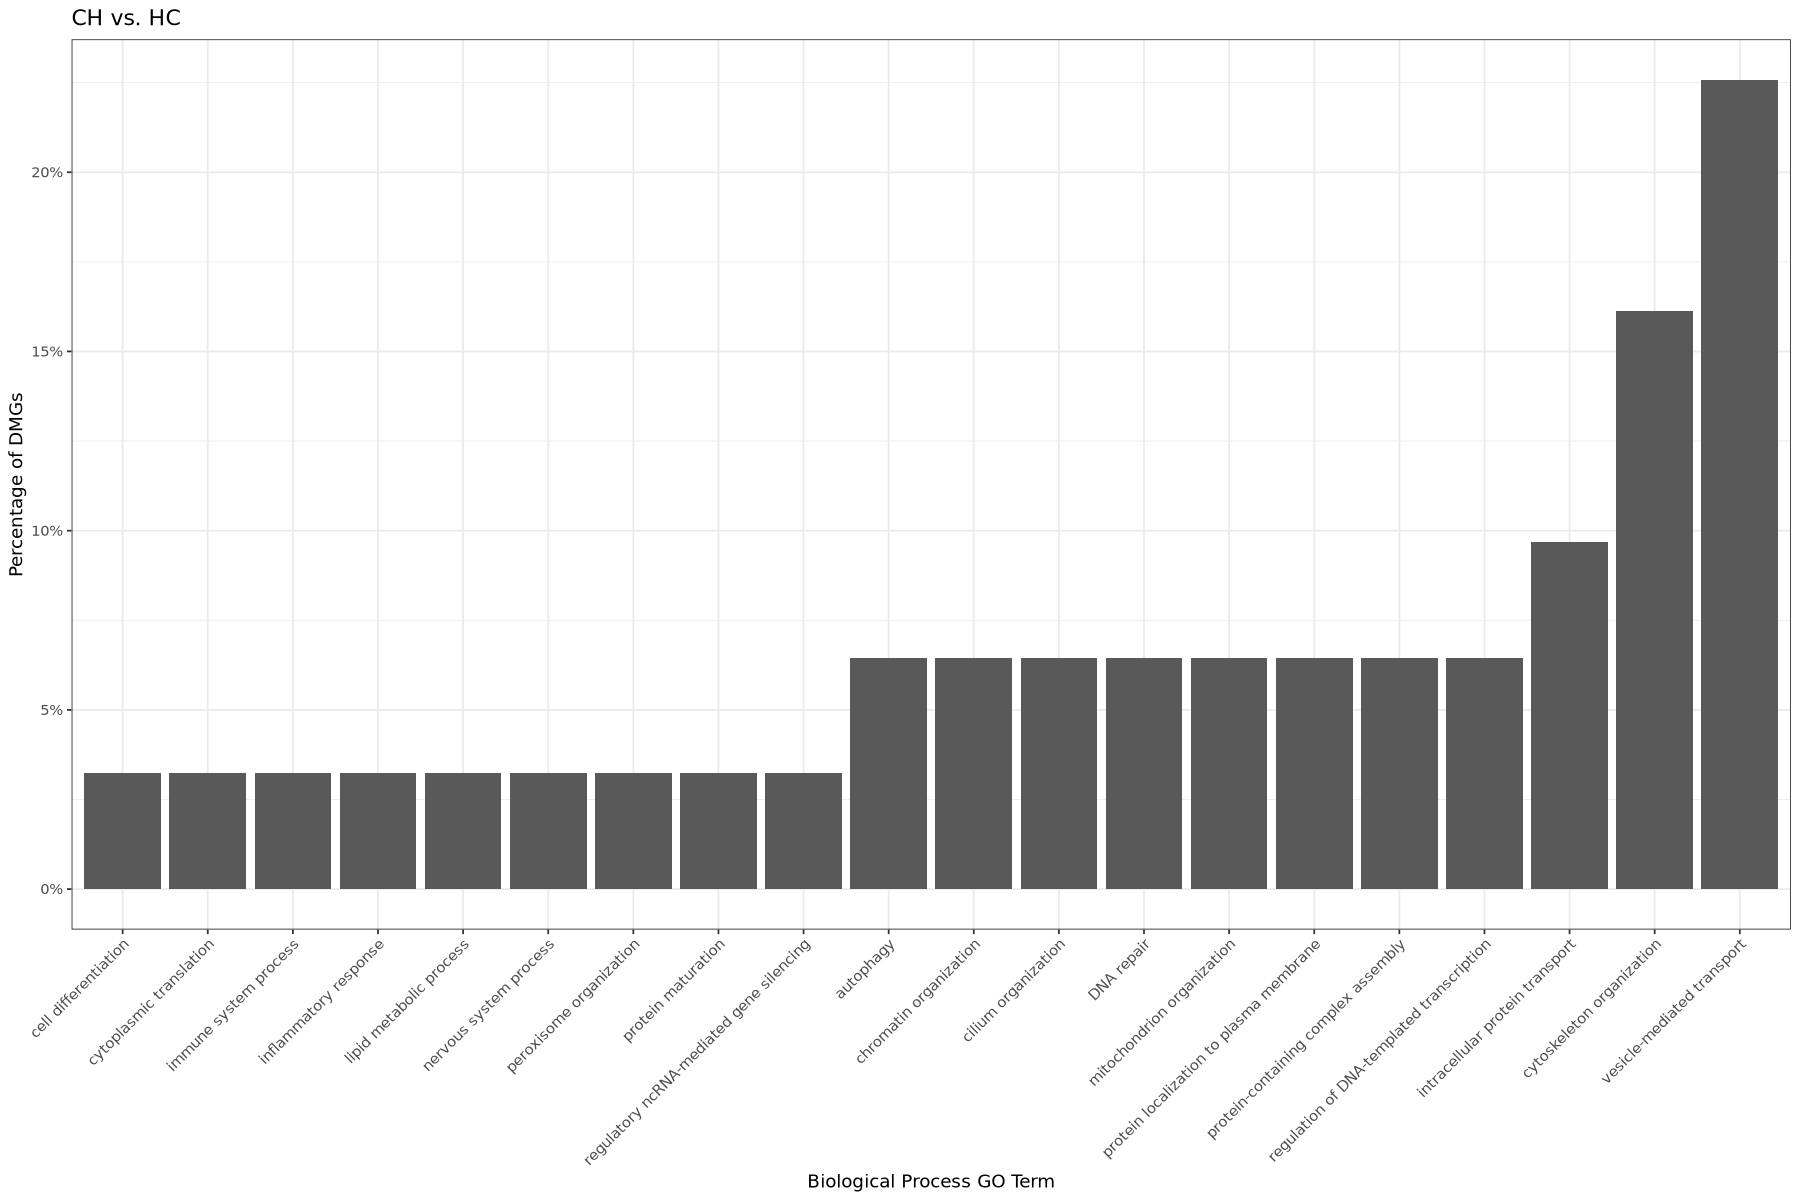

In [89]:
# Calculate the total number of genes
total_genes <- length(unique(gene_goslim_data$gene))

# Count the occurrences of each GO term and calculate the percentage
go_term_percentages <- gene_goslim_data %>%
  group_by(GO_Term) %>%
  summarise(count = n()) %>%
  mutate(percentage = (count / total_genes) * 100)

# Create the bar plot
ggplot(go_term_percentages, aes(x = reorder(GO_Term, percentage), y = percentage)) +
  geom_bar(stat = "identity") +
  labs(title = "CH vs. HC", x = "Biological Process GO Term", y = "Percentage of DMGs") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(labels = function(x) paste0(round(x, 2), "%"))

### molecular function

In [94]:
# Extract GO Slim terms from the OBO file
goslim_terms <- character()
goslim_ids <- character()
namespace <- character()
in_mf_term <- FALSE

for (line in goSlim) {
  if (grepl("^id:", line)) {
    goslim_id <- gsub("id: ", "", line)
    goslim_ids <- c(goslim_ids, goslim_id)
    in_mf_term <- FALSE
  } else if (grepl("^name:", line)) {
    goslim_term <- gsub("name: ", "", line)
    goslim_terms <- c(goslim_terms, goslim_term)
  } else if (grepl("^namespace:", line)) {
    namespace_value <- gsub("namespace: molecular_function", "MF", line)
    namespace_value <- gsub("namespace: ", "", namespace_value)
    namespace <- c(namespace, namespace_value)
    if (namespace_value == "MF") {
      in_mf_term <- TRUE
    }
  }
}

# Filter for molecular function terms
goslim_data <- data.frame(GO_ID = goslim_ids, GO_Term = goslim_terms, Namespace = namespace)
goslim_data_mf <- goslim_data[goslim_data$Namespace == "MF", c("GO_ID", "GO_Term")]

head(goslim_data_mf)

,GO_ID,GO_Term
,<chr>,<chr>
4,GO:0001618,virus receptor activity
11,GO:0003677,DNA binding
12,GO:0003723,RNA binding
13,GO:0003774,cytoskeletal motor activity
14,GO:0003824,catalytic activity
15,GO:0003924,GTPase activity


In [95]:
# Map genes to GO Slim terms
gene_goslim_data <- merge(gene2GO, goslim_data_mf, by.x = "GO_ID", by.y = "GO_ID")
gene_goslim_data <- merge(CHgeneList, gene_goslim_data, by.x = "gene", by.y = "gene")

head(gene_goslim_data)

,gene,GO_ID,GO_Term
,<chr>,<chr>,<chr>
1,LOC111105293,GO:0005198,structural molecule activity
2,LOC111107780,GO:0005198,structural molecule activity
3,LOC111108235,GO:0003723,RNA binding
4,LOC111112319,GO:0003924,GTPase activity
5,LOC111112560,GO:0003924,GTPase activity
6,LOC111112938,GO:0045182,translation regulator activity


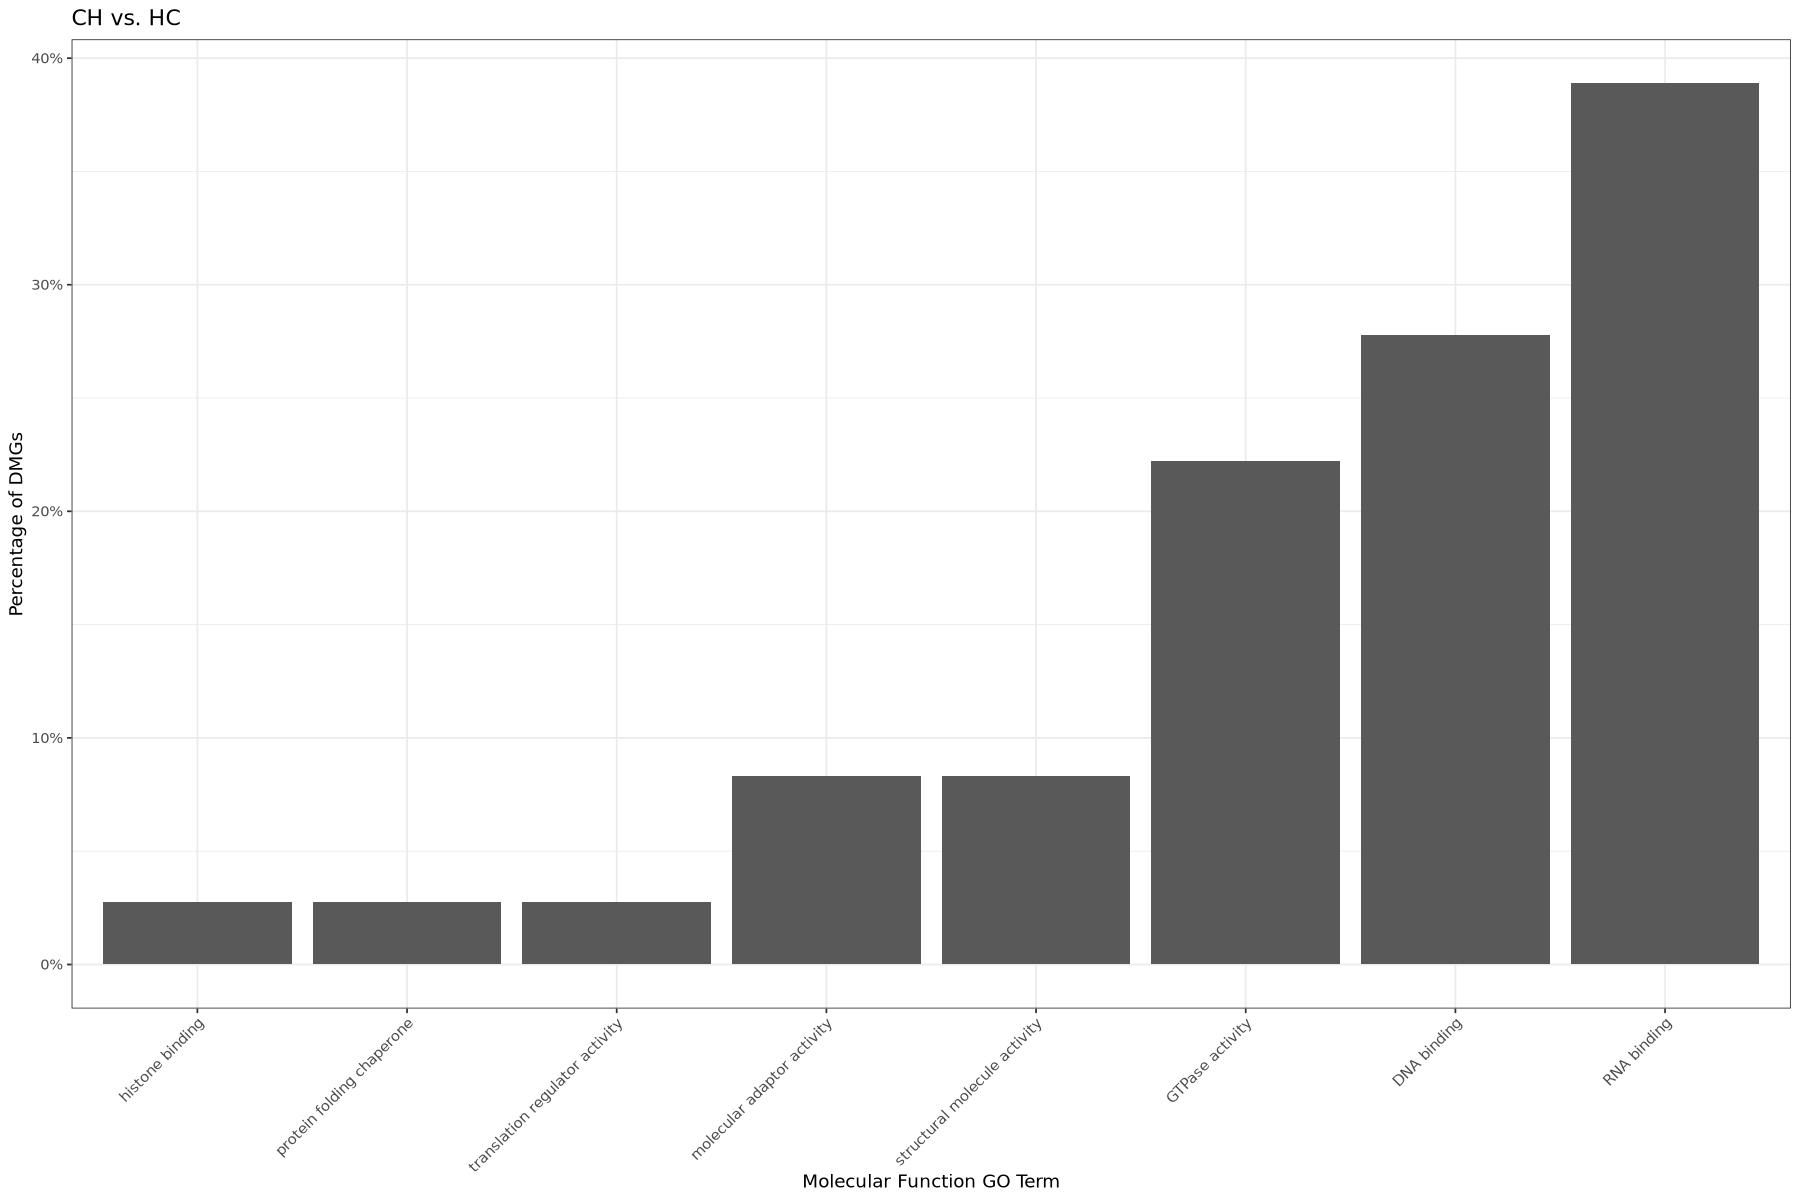

In [96]:
# Calculate the total number of genes
total_genes <- length(unique(gene_goslim_data$gene))

# Count the occurrences of each GO term and calculate the percentage
go_term_percentages <- gene_goslim_data %>%
  group_by(GO_Term) %>%
  summarise(count = n()) %>%
  mutate(percentage = (count / total_genes) * 100)

# Create the bar plot
ggplot(go_term_percentages, aes(x = reorder(GO_Term, percentage), y = percentage)) +
  geom_bar(stat = "identity") +
  labs(title = "CH vs. HC", x = "Molecular Function GO Term", y = "Percentage of DMGs") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(labels = function(x) paste0(round(x, 2), "%"))